<a href="https://colab.research.google.com/github/hcgalvantech/proyecto_integrado_2xxx/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes agregar más)
apellidos = ["Gómez", "Rodríguez", "López", "Fernández", "García", "Martínez", "Pérez", "González", "Álvarez", "Díaz"]
nombres = ["Juan", "María", "Carlos", "Laura", "Pedro", "Ana", "Luis", "Marta", "Diego", "Sofía"]


# Función para generar datos aleatorios
def generar_datos():
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  return [apellido, nombre, dni, materia, nota1, nota2, nota3, faltas]


# Crear un DataFrame con 100 filas de datos aleatorios
data = []
for _ in range(100):
  data.append(generar_datos())

df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,López,Luis,19057451,Ciencias Naturales,8,3,4,11
1,García,Luis,10418694,Sociología,7,3,8,12
2,Fernández,Ana,58049035,Ciencias Naturales,9,8,1,4
3,García,Juan,74851074,Inglés,5,6,9,0
4,González,Pedro,77089853,Historia,5,8,3,16
...,...,...,...,...,...,...,...,...
95,González,Juan,72187597,Biología,3,6,3,17
96,López,Luis,21541828,Matemática,5,10,7,12
97,Martínez,Laura,77191981,Filosofía,2,3,5,2
98,García,María,98693762,Filosofía,1,4,2,5


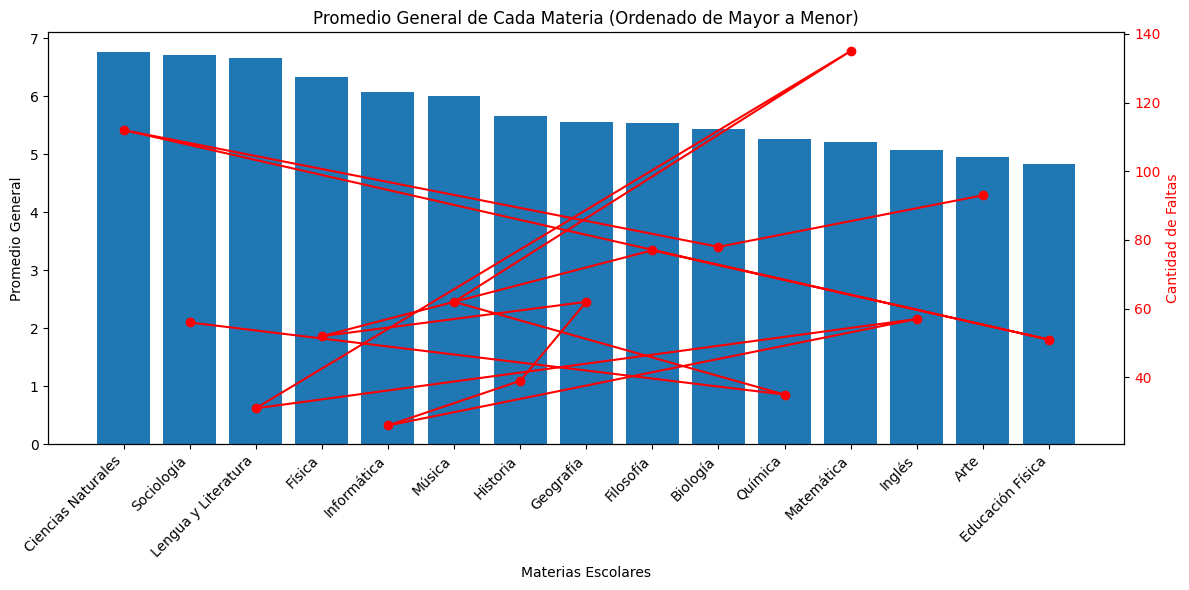

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias de mayor a menor promedio
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values)
plt.xlabel('Materias Escolares')
plt.ylabel('Promedio General')
plt.title('Promedio General de Cada Materia (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45, ha='right')

# Agregar un segundo eje para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajustar el espacio entre las etiquetas del eje x
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)